STEPS:


*   loading the data
*   splitting data into training and test sets (80%/20%)
*   splitting training set into training sets we are using for training the model and the validation set (80%/75%)
*   our dataset is approximately: train(60%), validation(20%), test(20%)
*   scaling the data to make it easier for the model to learn and understand the problem
*   creating the model
*   compiling the model
*   training the model
*   evaluating on test data











**Importing libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import os
import numpy as np
from keras import layers
import pandas as pd

#**Loading the data**

In [ ]:
# my input data will consist of coulomb matrices and target data are gap values
## Now I have folder with 500 and 2000 coulomb matrices with different order than GAP values and filenames so I need to loop through folder and sort files
### For target data, I will just extract them to an array since I am using that order
Cdir = "/content/drive/MyDrive/University/PHYS400/2000 coulomb matrices/"
dir = "/content/drive/MyDrive/University/PHYS400/"

In [ ]:
# PREPARING DATA FOR INPUT

fholder = open("2000 molecules filenames.txt","r")
fholder = fholder.readlines()
filenames = []
for i in fholder:
  i = i.strip("\n")
  filenames.append(i)      #filenames are ordered same like GAP values

Cmatrices = []
CMfiles = os.listdir(Cdir)
for filename in filenames:
  for CMfile in CMfiles:
    if filename == CMfile:
      with open(Cdir + filename) as openfile:
        openfile = openfile.readlines()
        onlyline = openfile[0].split(",")
        arr = []
        for i in onlyline:
          if i != "":
            i = float(i)
            arr.append(i)
        Cmatrices.append(arr)
# Cmatrices is a list with 2000 sublists where each sublist is 1D Coulomb matrix representation
# The order of sublists correspond to the order of filenames
X = np.asarray(Cmatrices)

In [ ]:
# PREPARING TARGET VALUES
# GAP values are contained in one file, so Im gonna read it and create an array 1D array of 500 gap values
# correspoding to the same order as in filenames and Cmatrices

fholder = open("2000 molecules GAP values.txt","r")
fholder = fholder.readlines()
GAPvalues = []
for i in fholder:
  i = i.strip("\n")
  i = float(i)
  GAPvalues.append(i)
Y = np.asarray(GAPvalues)

In [ ]:
print(X_train_scaled[0])

#**Splitting and scaling data**

In [ ]:
# From the previous step I have two arrays X and Y. X is np 2D array of shape (500,27*27) and Y is 1D array of 500 elements
# First splitting to train_full (80%) and test sets (20%)
# Second splitting the train_full set to train and validation so that validation and test sets have approx. 20% each of all data
# Thirdly, we scale the input data by fitting to train data. 
# No fitting for validation and test since we don't want our model to learn features and trends in test/validation data.

X_train_full , X_test, Y_train_full, Y_test = train_test_split(X, Y, train_size=0.8)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_full,Y_train_full, train_size=0.75)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# **Model**

In [ ]:
model3 = keras.models.load_model("third_keras_model.h5")

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer_1 (Dense)      (None, 60)                50520     
                                                                 
 Hidden_layer_2 (Dense)      (None, 40)                2440      
                                                                 
 Hidden_layer_3 (Dense)      (None, 30)                1230      
                                                                 
 Hidden_layer_4 (Dense)      (None, 10)                310       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 54,511
Trainable params: 54,511
Non-trainable params: 0
_________________________________________________________________


In [ ]:
evals = model3.evaluate(X_test_scaled,Y_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.4457 - mean_absolute_percentage_error: 11.7795


In [ ]:
# Creating the model
model = keras.Sequential(
    [
     layers.Dense(60, activation="relu",kernel_regularizer="l2", name="Hidden_layer_1", input_shape=X_train.shape[1:]),
     layers.Dense(40, activation="relu",kernel_regularizer='l2',name="Hidden_layer_2"),
     layers.Dense(30,activation="relu",kernel_regularizer='l2',name="Hidden_layer_3"),
     layers.Dense(10,activation="relu",kernel_regularizer='l2',name="Hidden_layer_4"),
     layers.Dense(1)
    ]
)
# define optimized and loss function
learn_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-3,decay_steps=10000,decay_rate=0.0009)
opt = tf.keras.optimizers.Adam(learning_rate = learn_schedule)
optt = tf.keras.optimizers.Adam(learning_rate = 0.0001)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

model.compile(loss="mean_squared_error", optimizer= opt,metrics=["mean_absolute_percentage_error"])

#training the model
history = model.fit(
    x=X_train_scaled, y=Y_train,
    epochs=20, 
    batch_size= 32,
    validation_data = (X_valid_scaled,Y_valid),
    callbacks = [callback]
)
#evaluating
evals = model.evaluate(X_test_scaled,Y_test)
len(history.history['loss'])

Epoch 1/20
38/38 [==============================] - 1s 9ms/step - loss: 1.8681 - mean_absolute_percentage_error: 50.7149 - val_loss: 1.5968 - val_mean_absolute_percentage_error: 36.8398
Epoch 2/20
38/38 [==============================] - 0s 5ms/step - loss: 1.4053 - mean_absolute_percentage_error: 25.6921 - val_loss: 1.2358 - val_mean_absolute_percentage_error: 30.6337
Epoch 3/20
38/38 [==============================] - 0s 4ms/step - loss: 1.1422 - mean_absolute_percentage_error: 20.1717 - val_loss: 0.9557 - val_mean_absolute_percentage_error: 21.9471
Epoch 4/20
38/38 [==============================] - 0s 4ms/step - loss: 0.9044 - mean_absolute_percentage_error: 17.5216 - val_loss: 0.8058 - val_mean_absolute_percentage_error: 24.3883
Epoch 5/20
38/38 [==============================] - 0s 5ms/step - loss: 0.8287 - mean_absolute_percentage_error: 19.2983 - val_loss: 0.6501 - val_mean_absolute_percentage_error: 18.8342
Epoch 6/20
38/38 [==============================] - 0s 4ms/step - loss

20

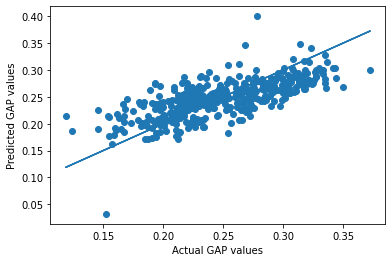

In [ ]:
predictedGAPs = model3.predict(X_test_scaled)
plt.scatter(Y_test, predictedGAPs)
plt.plot(Y_test, Y_test)
plt.xlabel("Actual GAP values")
plt.ylabel("Predicted GAP values")
plt.show()

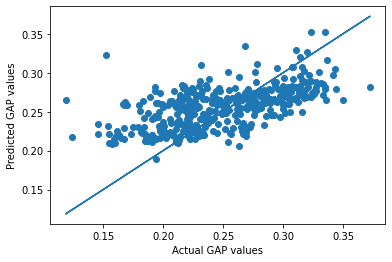

In [ ]:
predictedGAPs = model.predict(X_test_scaled)
plt.scatter(Y_test, predictedGAPs)
plt.plot(Y_test, Y_test)
plt.xlabel("Actual GAP values")
plt.ylabel("Predicted GAP values")
plt.show()

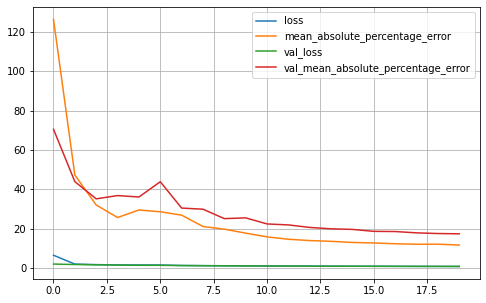

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

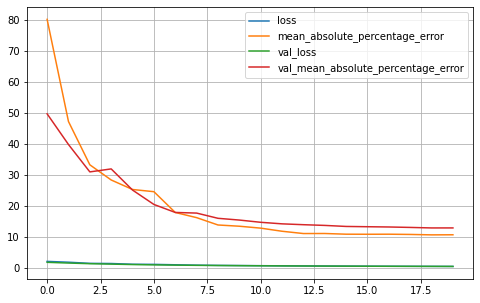

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

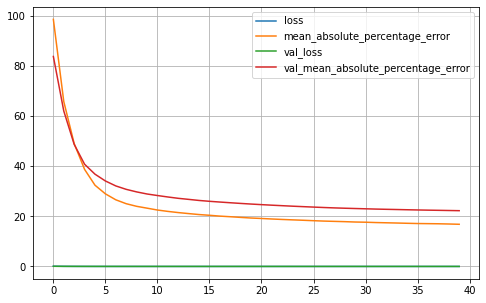

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
model.save("third_keras_model.h5")